In [684]:
## Classification of Fire Types in India Using MODIS Satellite Data (2021–2023)

In [685]:
## India witnesses various types of fire incidents annually, including forest fires, agricultural burning, volcanic activity, and other thermal anomalies. Accurate identification of fire sources is crucial for timely disaster response, environmental monitoring, and resource management. The MODIS sensors aboard NASA’s Terra and Aqua satellites provide reliable, near real-time thermal anomaly data globally, including for India.

## While the MODIS dataset includes rich geospatial and thermal parameters, the challenge lies in correctly classifying the type of fire event — whether it stems from vegetation, volcanoes, static land sources, or offshore sources — using satellite-captured features.

### Objective:
To develop a machine learning classification model that can accurately predict the type of fire using MODIS fire detection data for India from 2021 to 2023

### 🔥 MODIS Dataset Summary (India: 2021–2023)
#### 📌 About MODIS:
The Moderate Resolution Imaging Spectroradiometer (MODIS) is a key NASA sensor aboard the Terra (launched 1999) and Aqua (launched 2002) satellites. It captures Earth observation data at a spatial resolution of 1 km, suitable for global fire monitoring and environmental studies.

MODIS data used in this project is sourced from NASA’s FIRMS (Fire Information for Resource Management System) and focuses on thermal anomalies and active fire detection.

## 🛰️ Satellite Characteristics:
Terra satellite (EOS AM) captures morning overpasses.

Aqua satellite (EOS PM) captures afternoon overpasses.

MODIS provides 2–4 observations per day, especially in mid-latitudes like India.

## 🔍 Fire Detection Mechanism:
*MODIS uses contextual algorithms to detect thermal anomalies.*

*It evaluates each pixel using mid-infrared channels (Bands 21/22 for  fire detection and 31 for surface temperature).*

*The pixel is marked as one of: missing, cloud, water, non-fire, fire, or unknown.*




### ⚠️ Note on Accuracy:
MODIS NRT (Near Real-Time) data may have slightly lower geolocation accuracy, particularly from Aqua satellite due to orbit estimation delays. Errors can occasionally reach several kilometers.



### ✅ Use Cases for MODIS Fire Data:
Real-time wildfire alerts

Agricultural burn detection

Forest fire management

Hotspot pattern analysis in ecological studies



### 📚 Reference Links:
🔗 NASA FIRMS Documentation

🔗 MODIS Active Fire Product Info (LP DAAC)

🔗 Understanding MODIS Fire Algorithm

### 🔬 Important Parameters in MODIS Data:

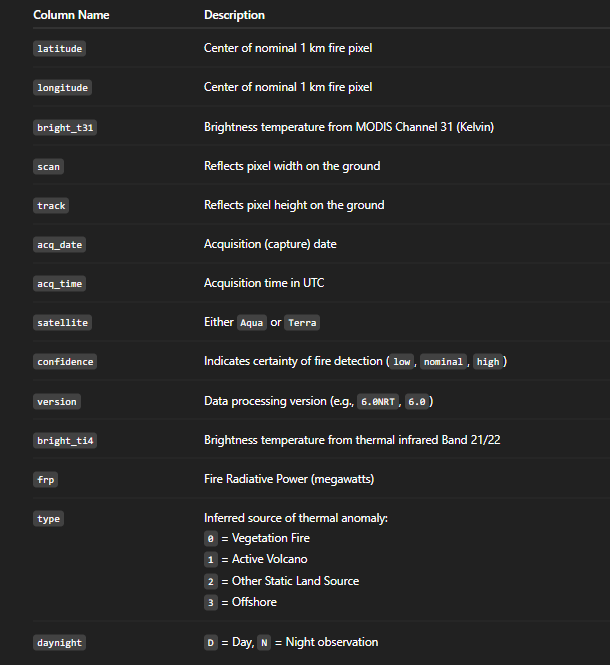




### 📚 Reference Links:

[🔗 NASA FIRMS Documentation](https://www.earthdata.nasa.gov/data/tools/firms)

[🔗 Global Fire Data Access Porta](https://firms.modaps.eosdis.nasa.gov/download/)

### Import Libraries

#### pip install numpy pandas matplotlib seaborn scikit-learn folium

In [692]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [693]:
!pip install xgboost

In [694]:
import xgboost
print(xgboost.__version__)

3.0.2


## Load the dataset

In [696]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [697]:
df1.head() # print first 5 rows - df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [698]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [699]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [700]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [701]:
df.shape # rows and cols

(271217, 15)

df.info() # dt, memc

In [703]:
# Any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [704]:
df.duplicated().sum()

0

In [705]:
# List out column names to check
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

df.describe().T # statistics of dataset - numbers!

In [707]:
# Check Unique values of target variable
df.type.value_counts()

type
0    257625
2     13550
3        42
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [709]:
# Check unique and n unique for all categorical features
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()


- The count plot shows the distribution of different fire types in the dataset.
- It is evident that 'MODIS' is the most frequent fire type, followed by 'VIIRS'.
- The 'type' variable appears to be unbalanced, with 'MODIS' having significantly more observations than 'VIIRS'. This imbalance might need to be considered during model training.

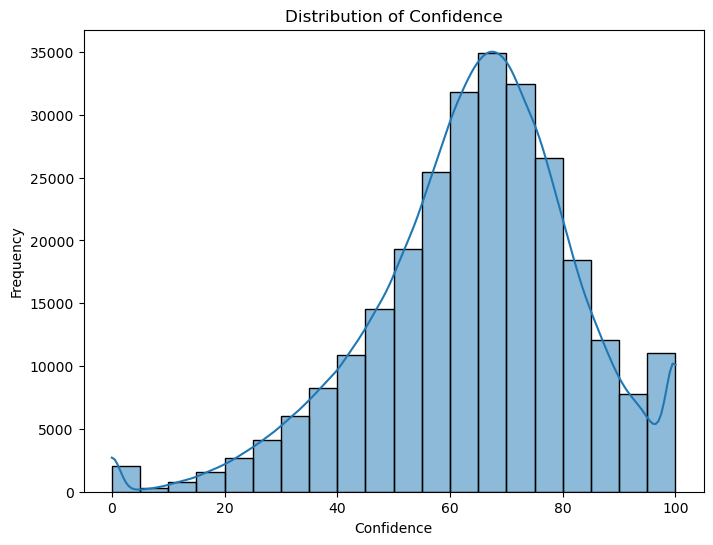

In [712]:
# Histogram of 'confidence'
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

#- The histogram illustrates the distribution of the 'confidence'feature.
#- The distribution appears to be bimodal, with peaks around low confidence values and high confidence values.
#- There are fewer observations in the middle range of confidence.
#- This suggests that observations are often recorded with either low confidence or high confidence.